In [1]:
# Importing libraries
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
from shapely.geometry import Point, Polygon

In [2]:
# Setting paths
home_path = os.path.expanduser('~/gcp_projects/Sentinel_SAR')

# UK Oil terminal data
terminal_file_path = 'data/uk_oil_terminals.xlsx'
terminal_file_path = os.path.join(home_path, terminal_file_path)
df = pd.read_excel(terminal_file_path, skiprows = 1)
df

,Name,Region,Lon,Lat
0,Repsol Sinopec Resources UK Limited (Flotta),"Flotta, Scotland",-3.121350,58.838348
1,INEOS Forties Pipeline System (Dalmeny),"Dalmney, Scotland",-3.368302,55.976118
2,INEOS Group Ltd. (Finnart Ocean Terminal),"Garelochhead, Scotland",-4.835650,56.112704
3,Sullom Voe Oil Terminal,"Shetland, Scotland",-1.282308,60.469058
4,"Valero Energy Pembrokeshire, Puma Energy (UK) ...","Milford Haven, Wales",-5.026209,51.687656
5,Zenith Energy Bantry Bay Terminals Ltd.,"Bantry, Ireland",-9.521472,51.684346
6,Navigator Terminals UK Ltd. (North Tees),"Middlesbrough, Engnland",-1.211958,54.637146
7,Associated Petroleum Terminals Ltd. (Immingham...,"Immingham, England",-0.254177,53.644298
8,Tetney Marine Terminal,"Tetney, England",0.001010,53.499929
9,BP Oil Fuel Terminal (Hamble),"Hamble-le-Rice, England",-1.362786,50.832818


<Axes: >

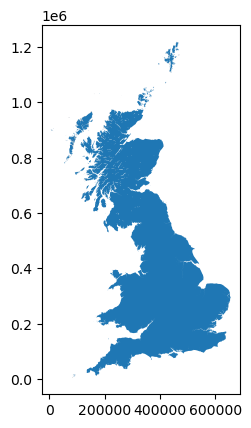

In [3]:
# UK Shape file
shp_file_path = 'data/shp_file/infuse_gb_2011_clipped.shp'
shp_file_path = os.path.join(home_path, shp_file_path)

uk_map = gpd.read_file(shp_file_path)
uk_map.plot()

In [4]:
# UK oil data CRS conversion
crs = {'init':'EPSG:4326'}
geometry = [Point(xy) for xy in zip(df['Lon'], df['Lat'])]
geo_df = gpd.GeoDataFrame(df, 
                          crs = crs, 
                          geometry = geometry)
geo_df

/home/vardh/mambaforge/envs/sar/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,Name,Region,Lon,Lat,geometry
0,Repsol Sinopec Resources UK Limited (Flotta),"Flotta, Scotland",-3.121350,58.838348,POINT (-3.12135 58.83835)
1,INEOS Forties Pipeline System (Dalmeny),"Dalmney, Scotland",-3.368302,55.976118,POINT (-3.36830 55.97612)
2,INEOS Group Ltd. (Finnart Ocean Terminal),"Garelochhead, Scotland",-4.835650,56.112704,POINT (-4.83565 56.11270)
3,Sullom Voe Oil Terminal,"Shetland, Scotland",-1.282308,60.469058,POINT (-1.28231 60.46906)
4,"Valero Energy Pembrokeshire, Puma Energy (UK) ...","Milford Haven, Wales",-5.026209,51.687656,POINT (-5.02621 51.68766)
5,Zenith Energy Bantry Bay Terminals Ltd.,"Bantry, Ireland",-9.521472,51.684346,POINT (-9.52147 51.68435)
6,Navigator Terminals UK Ltd. (North Tees),"Middlesbrough, Engnland",-1.211958,54.637146,POINT (-1.21196 54.63715)
7,Associated Petroleum Terminals Ltd. (Immingham...,"Immingham, England",-0.254177,53.644298,POINT (-0.25418 53.64430)
8,Tetney Marine Terminal,"Tetney, England",0.001010,53.499929,POINT (0.00101 53.49993)
9,BP Oil Fuel Terminal (Hamble),"Hamble-le-Rice, England",-1.362786,50.832818,POINT (-1.36279 50.83282)


In [5]:
# Calculating distance between coords
from shapely.geometry.point import Point

points = gpd.GeoSeries(
    [Point(-73.5, 40.5), Point(-74.5, 40.5)], crs=4326
)  # Geographic WGS 84 - degrees
points = points.to_crs(32619)  # Projected WGS 84 - meters

distance_meters = points[0].distance(points[1])

Text(256.5469235224727, 0.5, 'Latitude')

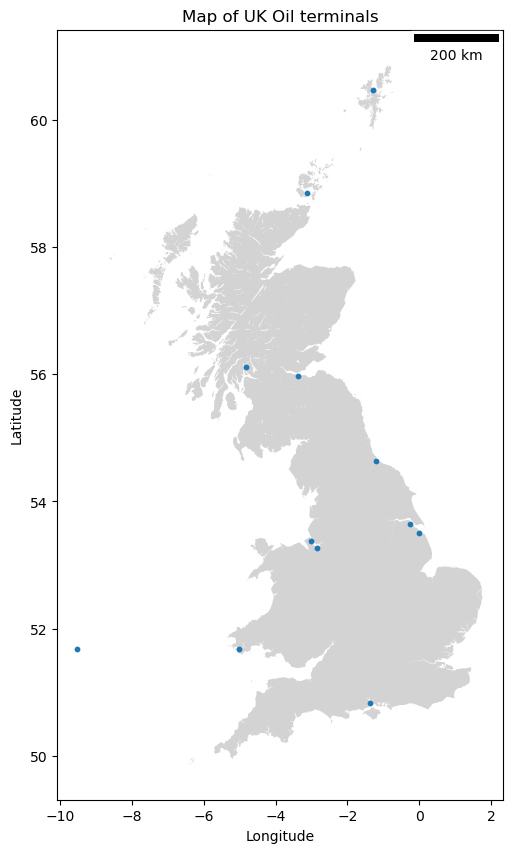

In [6]:
# Plotting
fig, ax = plt.subplots(figsize = (10,10))
uk_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
geo_df.plot(ax=ax, markersize=10)
ax.add_artist(ScaleBar(distance_meters))
ax.set_title('Map of UK Oil terminals')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')